#  Tutorial 02 – Loading and Interpreting Output

This tutorial walks through how to load and explore Pywr-DRB simulation results using the `pywrdrb.Data` class.

After running a simulation (see Tutorial 01), the model writes an output file in HDF5 format containing time series data for reservoir storage, streamflows, releases, and more.

We will use the `Data` class to:
- Load selected results sets from the `.hdf5` file
- Inspect the structure of the results
- Preview the data as pandas DataFrames
- Optionally plot key results


## Step 1 – Specify Output Filename and Result Sets

We begin by specifying the output file path and the `results_sets` we want to load. These sets tell the `Data` class what variables to extract from the simulation results.

Common result sets include:
- `'res_storage'`: reservoir storage (MG)
- `'major_flow'`: streamflow at key nodes
- `'res_release'`: combined outflow + spill at each reservoir
- `'inflow'`: inflows at each catchment

A full list is available at: https://pywr-drb.github.io/Pywr-DRB/results_set_options.html


In [7]:
import pywrdrb

output_filename = "./pywrdrb_output.hdf5"
datatypes = ['output']
results_sets = ['major_flow', 'res_storage']


## Step 2 – Load the Output Data Using `pywrdrb.Data`

The `pywrdrb.Data` class handles structured loading of simulation output.

Each dataset is loaded into a nested dictionary:



- `<results_set>` is something like `res_storage`
- `<file_label>` is derived from the filename (e.g., `pywrdrb_output`)
- `<scenario_index>` is usually `0` unless running ensemble simulations

We use the `.load_output()` method here, since we're loading model results.


In [8]:
# Initialize a data object
data = pywrdrb.Data(
    print_status=True,
    results_sets=results_sets,
    output_filenames=[output_filename]
)

# Load model output data
data.load_output()

# Extract the dataframes for plotting
df_major_flow = data.major_flow["pywrdrb_output"][0]
df_res_storage = data.res_storage["pywrdrb_output"][0]


Loading pywrdrb output data...
Loading major_flow data from pywrdrb_output
Loading res_storage data from pywrdrb_output


## Step 3 – Preview Reservoir Storage Results

Let’s inspect the first few rows of reservoir storage data.

Each column represents a modeled reservoir. Each row corresponds to a simulation date.


In [4]:
# Preview the first few rows of storage
data.res_storage["pywrdrb_output"][0].head()


,assunpink,beltzvilleCombined,blueMarsh,cannonsville,fewalter,greenLane,hopatcong,merrillCreek,mongaupeCombined,neversink,nockamixon,ontelaunee,pepacton,prompton,shoholaMarsh,stillCreek,wallenpaupack
1983-10-01,3256.776222,10490.560344,32701.471167,76092.788873,27394.345142,6279.249638,12505.019888,11974.745157,22045.048005,27739.532842,17884.099146,3059.969286,111441.139280,22147.240379,6721.067635,3028.346877,69710.496598
1983-10-02,3229.674026,10480.779314,31774.993385,75678.636878,26150.691712,6063.296106,12434.655140,11966.924888,21397.929461,27610.869028,17254.298082,3098.192885,110833.521297,21928.605648,6552.604752,3035.271871,69068.486147
1983-10-03,3205.071202,10470.263708,30844.503718,75285.930854,24905.407834,5787.502806,12362.335673,11958.930889,20743.919708,27467.656487,16622.542298,3133.490218,110258.209023,21709.008357,6383.625397,3040.616105,68412.500014
1983-10-04,3165.951715,10459.109516,29911.917205,74761.937269,23658.641891,5480.364236,12289.416294,11950.547484,20082.349067,27276.565827,15990.186603,3167.976361,109490.561159,21488.571567,6214.406194,3045.672275,67735.738138
1983-10-05,3122.568538,10344.980526,28978.787075,74216.905806,22410.376286,5172.989954,12216.292227,11941.832196,19418.922958,27077.803047,15357.626219,3201.980996,108692.092914,21267.400947,6045.136837,3050.547282,67056.965478


## Step 4 – Plot Time Series (Optional)

Here’s a simple example that visualizes storage in one of the reservoirs. You can replace `'beltzvilleCombined'` with any other reservoir name from the column headers.


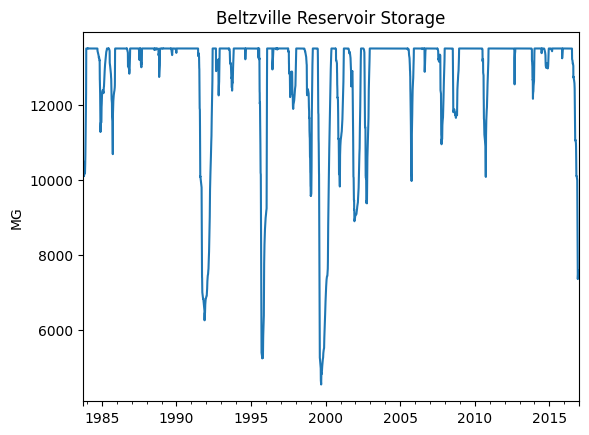

In [5]:
import matplotlib.pyplot as plt

df = data.res_storage["pywrdrb_output"][0]
df["beltzvilleCombined"].plot(title="Beltzville Reservoir Storage")
plt.ylabel("MG")
plt.show()

### Exploring NYC Reservoir Dynamics

Pywr-DRB includes a detailed representation of the New York City (NYC) reservoirs, which play a critical role in supplying water to downstream users and managing drought risk in the Delaware River Basin.

The three major NYC reservoirs are:
- Cannonsville
- Pepacton
- Neversink

By visualizing their simulated storage dynamics, we can assess seasonal variability, drought resilience, and management impacts over time.


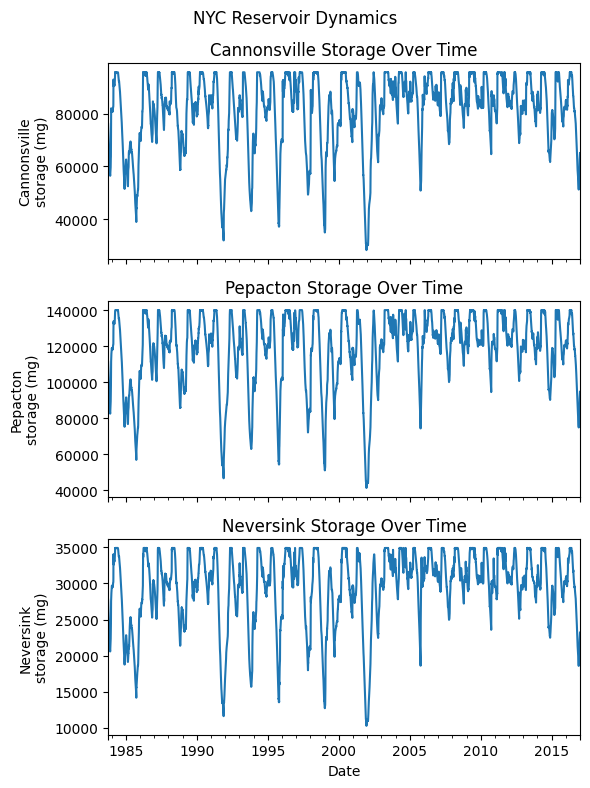

In [10]:
# Define NYC reservoirs to plot
nyc_reservoirs = ['cannonsville', 'pepacton', 'neversink']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8), sharex=True)

for ax, res in zip(axes, nyc_reservoirs):
    df_res_storage[res].plot(ax=ax)
    ax.set_ylabel(f"{res.capitalize()}\nstorage (mg)")
    ax.set_title(f"{res.capitalize()} Storage Over Time")

plt.xlabel("Date")
plt.suptitle("NYC Reservoir Dynamics", y=0.98)
plt.tight_layout()
plt.show()


###  Summary

- You’ve now loaded and explored results from a Pywr-DRB simulation.
- You can use these outputs for further analysis, visualization, or calibration diagnostics.
- The `Data` class ensures consistency when working across observed data, simulated outputs, and hydrologic model flows.

###  Next Step:
Move to [Tutorial 03 – Using Custom Input Data](./03_Use_Custom_Inputs.ipynb) to simulate using your own inflow, release, or storage files.
